# MLP con back propagation utilizando 3 capas
### Carlos Hernández Montellano
### 1002-A.
### Redes neuronales

In [27]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
datos = datasets.load_iris()

In [4]:
X = datos.data

In [5]:
Y = datos.target

In [6]:
def oneHot(y, numElem, numClases):
    resp = np.zeros( [numElem, numClases])
    for i in np.arange(numClases):               
        resp[:,i] = (y==i)*1
        
    return resp

In [7]:
Yoh = oneHot(Y, Y.shape[0], Y.max()+1)

In [8]:
# cada 25 elementos, dan en total 2 de cada clase = 6 elementos.
print (Yoh[0:150:25])

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [9]:
X.shape

(150, 4)

In [10]:
#instancia de MinMaxScaler
mms = MinMaxScaler()

In [11]:
Xs = mms.fit_transform(X)

In [12]:
Xs[0:150:25]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.19444444, 0.41666667, 0.10169492, 0.04166667],
       [0.75      , 0.5       , 0.62711864, 0.54166667],
       [0.63888889, 0.41666667, 0.57627119, 0.54166667],
       [0.55555556, 0.54166667, 0.84745763, 1.        ],
       [0.80555556, 0.5       , 0.84745763, 0.70833333]])

In [13]:
#features en X 
numX = 4 
# num de neuronas en la capa oculta (H)
numH = 3
# num de neuronas de salida
numS = 3

In [14]:
class Capa():
    def __init__(self, numEntradas, numSalidas):
        self.pesos = np.random.uniform(low=-0.1, high=0.1, size=[numEntradas, numSalidas])

In [15]:
#probando la clase
t = Capa(5,3)
t.pesos

array([[-1.27629540e-05, -7.37326578e-02,  8.25204864e-02],
       [-2.73472959e-02,  6.88091950e-02, -9.88592064e-02],
       [ 1.58365129e-02, -1.13368510e-02, -5.72130317e-02],
       [-4.15707286e-02, -3.70610014e-02, -4.62144870e-03],
       [-1.69624551e-03,  8.59427385e-02, -2.24620821e-02]])

In [16]:
class MLP():
    def __init__(self, capa1, capa2, capa3, debug):
        self.capa1 = capa1
        self.capa2 = capa2
        self.capa3 = capa3
        self.debug = debug #para mostrar o no valores 
        
    def sigmoide(self, x):
        return 1/(1+np.exp(-x))
        
    def derSigmoide(self, x):
        return x*(1-x)
        
    def evaluar(self, entrada):
        self.yh1 = self.sigmoide( entrada.dot (self.capa1.pesos) )
        self.yh2 = self.sigmoide( self.yh1.dot(self.capa2.pesos) )
        self.yh3 = self.sigmoide( self.yh2.dot(self.capa3.pesos) )
        #if(self.debug):
        #    print("y1 = {} \ny2 = {} \n".format(self.yh1, self.yh2))
        return self.yh1,self.yh2, self.yh3
    
    def mostrarPesos(self):
        print("c1 = \n{}\n".format(self.capa1.pesos))
        print("c2 = \n{}\n".format(self.capa2.pesos))
        print("c3 = \n{}\n".format(self.capa3.pesos))
        
    # X entrada
    # Y salida
    # numIter = numero de iteraciones
    def entrenar(self, numIter, X, Y, n):
        
        for i in np.arange(numIter):
            if(self.debug):
                print("Iteración {}\n".format(i))
            
            y1, y2, y3 = self.evaluar(X)
            
            if(i==0 and self.debug):
                print("X.shape = {} Y.shape = {}".format(X.shape, Y.shape))
                print("y1.shape = {} y2.shape = {} y3.shape = {}".format(y1.shape, y2.shape, y3.shape))
            
            # error en capa de salida
            e3 = Y-y3
            
            #delta2
            d3 = e3 * self.derSigmoide(y3)
            
            if(i==0 and self.debug):
                print("e3.shape = {} d3.shape = {}".format(e3.shape, d3.shape))
            
            e2 = d3.dot(self.capa3.pesos.T)
            d2 = e2 * self.derSigmoide(y2)
            
            e1 = d2.dot(self.capa2.pesos.T)
            d1 = e1 * self.derSigmoide(y1)

            if(i==0 and self.debug):
                print("e1.shape = {} d1.shape = {}".format(e1.shape, d1.shape))
                
            ajuste1 = X.T.dot(d1)
            ajuste2 = y1.T.dot(d2)
            ajuste3 = y2.T.dot(d3)
            
            if(i==0 and self.debug):
                print("aj1.shape = {} aj2.shape = {}".format(ajuste1.shape, ajuste2.shape))
            self.capa1.pesos += n*ajuste1
            self.capa2.pesos += n*ajuste2
            self.capa3.pesos += n*ajuste3
            

In [29]:
bestN1 = 10
bestN2 = 10
bestAcc = 0.0
# Probando diferentes configuraciones de números de neuronas por capa
for n1 in range (10, 17):
    for n2 in range (10, 17):
        # Creando las capas de neuronas
        c1 = Capa(4,n1)
        c2 = Capa(n1,n2)
        c3 = Capa(n2,3)
        
        # Declaración de la red multicapa
        red = MLP(c1,c2,c3, False)
        
        # Entrenamiento de la red
        red.entrenar(500, Xs, Yoh, 0.05)
        
        # Evaluación del dataset de acuerdo con el entrenamiento
        y1, y2, y3 = red.evaluar(Xs)
        r = np.array([])
        for i in np.arange(150):
            r = np.append(r,np.argmax(y3[i]))
        
        # Accuracy
        acc = ((Y==r)*1).sum()/150
        print(acc)
        if (bestAcc < acc):
            bestAcc = acc
            bestN1 = n1
            bestN2 = n2
            bestR = r
            
print("\nMejor accuracy = %f, mejor n1 = %d, mejor n2 = %d" % (bestAcc, bestN1, bestN2))
        

0.9333333333333333
0.92
0.86
0.9133333333333333
0.92
0.9133333333333333
0.94
0.9066666666666666
0.9333333333333333
0.8333333333333334
0.88
0.9333333333333333
0.9466666666666667
0.88
0.9333333333333333
0.8933333333333333
0.92
0.9133333333333333
0.9533333333333334
0.9266666666666666
0.9333333333333333
0.9266666666666666
0.9533333333333334
0.9733333333333334
0.8933333333333333
0.9666666666666667
0.9666666666666667
0.96
0.96
0.9466666666666667
0.9133333333333333
0.9533333333333334
0.9333333333333333
0.92
0.9666666666666667
0.9666666666666667
0.96
0.9533333333333334
0.9533333333333334
0.9733333333333334
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.98
0.9666666666666667
0.94
0.9333333333333333

Mejor accuracy = 0.980000, mejor n1 = 16, mejor n2 = 13


In [30]:
((Y==r)*1).sum()

140

In [31]:
confusion_matrix(r, Y)

array([[50,  0,  0],
       [ 0, 50, 10],
       [ 0,  0, 40]], dtype=int64)

In [32]:
import mlxtend.data as mlxData
X, Y = mlxData.mnist_data()

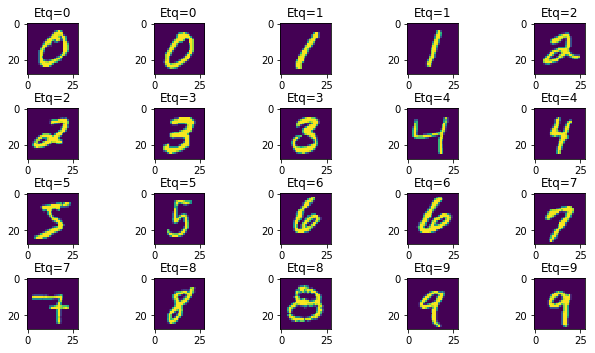

In [33]:
plt.rcParams["figure.figsize"] = (10,6)
plt.subplots_adjust(wspace = 1.5)

for i in np.arange(0,20):
    indx = i*250
    img = X[indx].reshape(28,28)
    plt.subplot(4,5,i+1)
    plt.title("Etq="+ str(Y[indx]))
    plt.imshow(img)

In [34]:
import sklearn.preprocessing as prep 

In [35]:
mms = prep.MinMaxScaler()
Xs = mms.fit_transform(X)

In [36]:
Yoh = oneHot(Y, Y.shape[0], Y.max()+1)

In [37]:
# cada 25 elementos, dan en total 2 de cada clase = 6 elementos.
print (Yoh[0:5000:500])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [38]:
num_parts = 20
inc = 5000/num_parts/10
inc

25.0

In [44]:
numIters = 500

bestN1 = 600
bestN2 = 600
bestAcc = 0.0
# Probando diferentes configuraciones de números de neuronas por capa
for n1 in range (600, 1101, 100):
    for n2 in range (600, 1101, 100):
        # Creando las capas de neuronas
        c1 = Capa(784,n1)
        c2 = Capa(n1,n2)
        c3 = Capa(n2,10)
        
        # Declaración de la red multicapa
        red = MLP(c1,c2,c3, False)
        
        # Entrenamiento de la red
        for i in np.arange(numIters):
            ini = (i%num_parts)*inc
            indices = np.array([])
            for ii in np.arange(10):
                indices = np.append(indices,  500*ii+np.arange(ini, ini+inc) )
                #print(" {} --> {}".format(500*ii+ini,500*ii+ ini+inc))
            indices = indices.astype(np.int)
            red.entrenar(5, Xs[indices], Yoh[indices], 0.00005)
        
        # Evaluación del dataset de acuerdo con el entrenamiento
        y1, y2, y3 = red.evaluar(Xs)
        r = np.array([])
        for i in np.arange(5000):
            r = np.append(r,np.argmax(y3[i]))
        
        # Accuracy
        acc = ((Y==r)*1).sum()/5000
        print(acc)
        if (bestAcc < acc):
            bestAcc = acc
            bestN1 = n1
            bestN2 = n2
            bestR = r
            
print("\nMejor accuracy = %f, mejor n1 = %d, mejor n2 = %d" % (bestAcc, bestN1, bestN2))
        


0.3808
0.3046
0.4304
0.4238
0.4842
0.46
0.4012
0.4272
0.4488
0.408
0.5232
0.4908
0.3892
0.5588
0.4124
0.4818
0.522
0.4794
0.4678


KeyboardInterrupt: 

In [46]:
print("\nMejor accuracy = %f, mejor n1 = %d, mejor n2 = %d" % (bestAcc, bestN1, bestN2))


Mejor accuracy = 0.558800, mejor n1 = 800, mejor n2 = 700


In [45]:
confusion_matrix(bestR, Y)

array([[468,   2,  37,  21,   3,  77,  13,   6,  25,  25],
       [  3, 497, 125, 108,  71, 196,  65, 103, 272, 144],
       [  1,   0, 235,   5,   6,   1,   1,   1,   8,   0],
       [  5,   0,  40, 342,   0, 137,   2,   2, 105,   9],
       [  0,   1,  16,   5, 366,  42,   4,  23,   8, 136],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 20,   0,  36,   7,  27,  34, 413,   7,  17,  11],
       [  3,   0,  10,   1,  19,   4,   2, 353,   7, 103],
       [  0,   0,   0,   0,   0,   3,   0,   0,  48,   0],
       [  0,   0,   1,  11,   8,   6,   0,   5,  10,  72]], dtype=int64)